<a href="https://colab.research.google.com/github/vuducanh0802/FeatureSelection/blob/main/Feature_Engineering_on_unknown_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will diccuss on how to deal with unknown variables, specially on feature selection 

source: Tabular Playground Series May 2021

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
train = pd.read_csv('/content/drive/MyDrive/DATA/train.csv')
train.sample(3)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
89453,89453,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,1,2,4,2,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,2,0,2,0,0,3,0,0,0,0,0,0,Class_4
52621,52621,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,7,1,1,0,0,0,0,0,3,0,0,9,0,0,13,0,0,0,1,0,0,0,2,Class_2
62181,62181,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,1,0,0,0,Class_2


#MISSING VALUES

Firstly, detecting NaN values is needed

In [68]:
train.isna().sum().sum()

0

There is no NaN value so nothing should be considered

# CORRELATION

using VIF to find multicollinearity and drop variables with high correlation

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(train.drop(columns=['id','target']))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const         5.884177
feature_0     1.001859
feature_1     1.001534
feature_2     1.002118
feature_3     1.001879
feature_4     1.001549
feature_5     1.001530
feature_6     1.001647
feature_7     1.001916
feature_8     1.001147
feature_9     1.001279
feature_10    1.001895
feature_11    1.002130
feature_12    1.001684
feature_13    1.002261
feature_14    1.000706
feature_15    1.001514
feature_16    1.002160
feature_17    1.001670
feature_18    1.001797
feature_19    1.001766
feature_20    1.001582
feature_21    1.001141
feature_22    1.001725
feature_23    1.001974
feature_24    1.001868
feature_25    1.001410
feature_26    1.001996
feature_27    1.001689
feature_28    1.001187
feature_29    1.001852
feature_30    1.001325
feature_31    1.001640
feature_32    1.001182
feature_33    1.001706
feature_34    1.001508
feature_35    1.001751
feature_36    1.001345
feature_37    1.001531
feature_38    1.001147
feature_39    1.001354
feature_40    1.001753
feature_41    1.001631
feature_42 

In [42]:
train.drop(columns=['id','target']).corr()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
feature_0,1.000000,0.009409,-0.005150,0.007556,-0.001383,-0.004215,0.004556,0.007358,-0.000675,0.006393,0.006907,0.007015,0.009450,-0.003582,0.006094,0.007553,0.007616,0.009440,0.006877,0.008361,0.003837,0.007138,0.004370,-0.001282,-0.002046,0.001631,0.009368,0.010862,0.003049,0.016042,0.002792,0.001510,0.001304,0.006566,0.001190,-0.000362,0.000328,0.009153,-0.001059,0.009161,0.005561,0.002689,0.000851,0.001722,0.007130,0.011503,0.006370,0.009593,0.005007,0.004884
feature_1,0.009409,1.000000,0.005437,0.004034,0.006808,0.003550,0.010591,0.011225,0.005902,-0.001261,0.008085,0.006465,0.003599,0.007211,0.005782,0.005709,0.009074,0.006018,0.006103,-0.000205,-0.000992,0.007080,0.002815,0.010744,0.003644,0.001341,0.005326,0.006860,0.007804,0.000998,0.008613,0.000712,0.003158,0.006139,0.001437,0.009947,0.004763,0.007054,0.006187,0.002200,0.003197,0.006774,0.000930,0.001485,0.009856,0.001302,0.001621,0.004651,0.003449,0.006846
feature_2,-0.005150,0.005437,1.000000,0.006261,0.001187,0.005621,0.003256,0.007021,0.004419,0.004522,0.005081,0.006261,0.004744,0.015043,-0.000456,-0.003219,0.007392,0.007123,-0.002458,0.001784,-0.001185,0.003438,0.009437,0.002617,0.004296,0.007111,0.013557,0.009699,0.001316,-0.000771,0.016471,0.011857,0.007600,0.009566,0.007673,0.002822,0.005293,0.004852,0.003928,-0.000694,0.002145,0.006023,-0.002452,0.015514,0.009142,-0.003528,0.002532,0.002284,0.003703,0.011090
feature_3,0.007556,0.004034,0.006261,1.000000,0.002121,-0.004890,0.008885,0.009060,0.009984,0.004670,-0.004088,0.004179,0.004630,0.008600,0.004863,0.004184,0.006835,0.005862,0.009474,0.005791,-0.003220,0.010860,-0.000830,0.003751,0.008000,0.006737,0.009419,0.009951,0.003599,0.006460,0.000835,0.010138,0.002545,0.010076,-0.007256,0.011746,0.008499,0.004196,0.004693,0.003695,0.007692,0.005166,0.003764,0.007557,0.002554,0.002937,0.001478,0.005162,-0.005613,0.007009
feature_4,-0.001383,0.006808,0.001187,0.002121,1.000000,0.004858,0.004431,0.009257,0.009862,0.008590,0.002557,0.005939,0.002485,0.004407,-0.002895,-0.005196,0.004223,0.001703,0.000896,-0.002088,0.002343,0.002081,0.003033,0.013443,0.009472,0.006436,0.002958,-0.000507,-0.000657,-0.000767,0.004895,0.009497,0.010221,0.007773,0.009416,0.006505,0.001632,0.003729,0.010565,0.010865,0.007492,0.007644,0.006602,0.003889,-0.000434,-0.000172,0.004466,0.002405,-0.000027,0.006742
feature_5,-0.004215,0.003550,0.005621,-0.004890,0.004858,1.000000,-0.000673,0.009072,-0.001640,0.002708,0.001964,0.004801,-0.000418,0.012390,-0.004013,-0.005147,0.006423,-0.003444,0.004473,0.009713,0.008983,0.001724,0.009612,0.006151,0.010208,0.001893,0.012646,0.008938,0.004464,-0.001518,0.005359,0.004911,0.002347,0.002181,0.005595,0.006214,0.003196,-0.000222,0.003040,0.005288,0.004225,0.005814,0.005704,0.010128,0.007404,0.004852,-0.000432,0.004903,0.006293,0.002617
feature_6,0.004556,0.010591,0.003256,0.008885,0.004431,-0.000673,1.000000,0.009118,0.004583,0.011149,0.002088,0.009379,0.008548,-0.001435,0.004417,0.006050,0.009328,0.006344,0.010410,0.002839,0.002153,0.006453,0.009496,0.007428,0.003615,0.002609,0.001697,0.008088,0.003805,0.003946,0.006231,0.005768,0.000153,0.000595,0.003421,0.000854,0.002574,0.000257,0.006160,-0.000959,0.009792,0.008931,0.002517,0.007941,0.002683,0.009715,0.002535,0.008581,0.004904,0.007396
feature_7,0.007358,0.011225,0.007021,0.009060,0.009257,0.009072,0.009118,1.000000,0.003761,0.001437,0.003886,0.008729,0.011733,0.005950,0.004096,0.001619,0.008498,0.001449,0.003664,0.00759

It seems that there is no high correlation since VIF is much lower than 10 (a standard for multicollinearity detection) <br>
In addition, the VIF of all features is very near to 1, hence it means there is no significant correlation between features so there may be unnecessary features.

Now we find the features with low variance (in this dataset we assume the threshold is 0.1)

In [56]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1).fit(train.drop(columns=['target','id']))
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

All are true so no need to eliminate features

# SKEWNESS

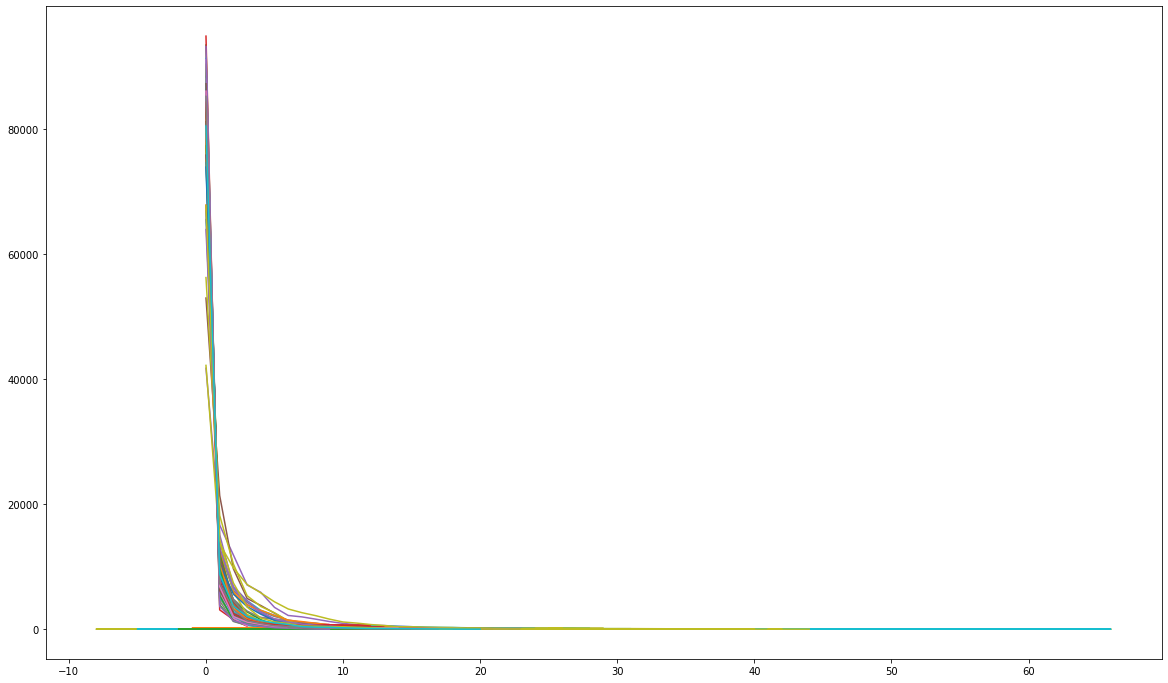

In [63]:
f = plt.figure(figsize=(20,12))
for i in train.drop(columns=['id','target']).columns:
  train[i].value_counts().plot()

As we can observe, all features have positive skewed distribution. Hence it may cause overfit problem

In [82]:
train.skew()

id             0.000000
feature_0      5.079623
feature_1      7.003455
feature_2      5.927801
feature_3      5.824333
feature_4      6.338914
feature_5      5.781105
feature_6      4.571082
feature_7      3.525130
feature_8      5.484545
feature_9      2.922816
feature_10     5.707307
feature_11     3.736769
feature_12     3.540541
feature_13     5.426875
feature_14     3.756581
feature_15     3.045829
feature_16     5.746727
feature_17     3.319273
feature_18     3.847518
feature_19     4.460163
feature_20     6.494115
feature_21     5.942497
feature_22     3.712286
feature_23     5.355453
feature_24     4.457423
feature_25     6.343172
feature_26     6.624273
feature_27     8.616955
feature_28     2.881756
feature_29     6.891485
feature_30    12.828861
feature_31     4.303107
feature_32     9.316900
feature_33     5.026483
feature_34     3.887324
feature_35     5.380972
feature_36     4.096571
feature_37     4.307444
feature_38     4.056401
feature_39     8.997924
feature_40     3

#MODELLING

we will try to use 2 methods which are XGBoost and LGBM

In [85]:
X = train.iloc[:,1:-1]
y = train['target']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [89]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42, use_label_encoder=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.57375

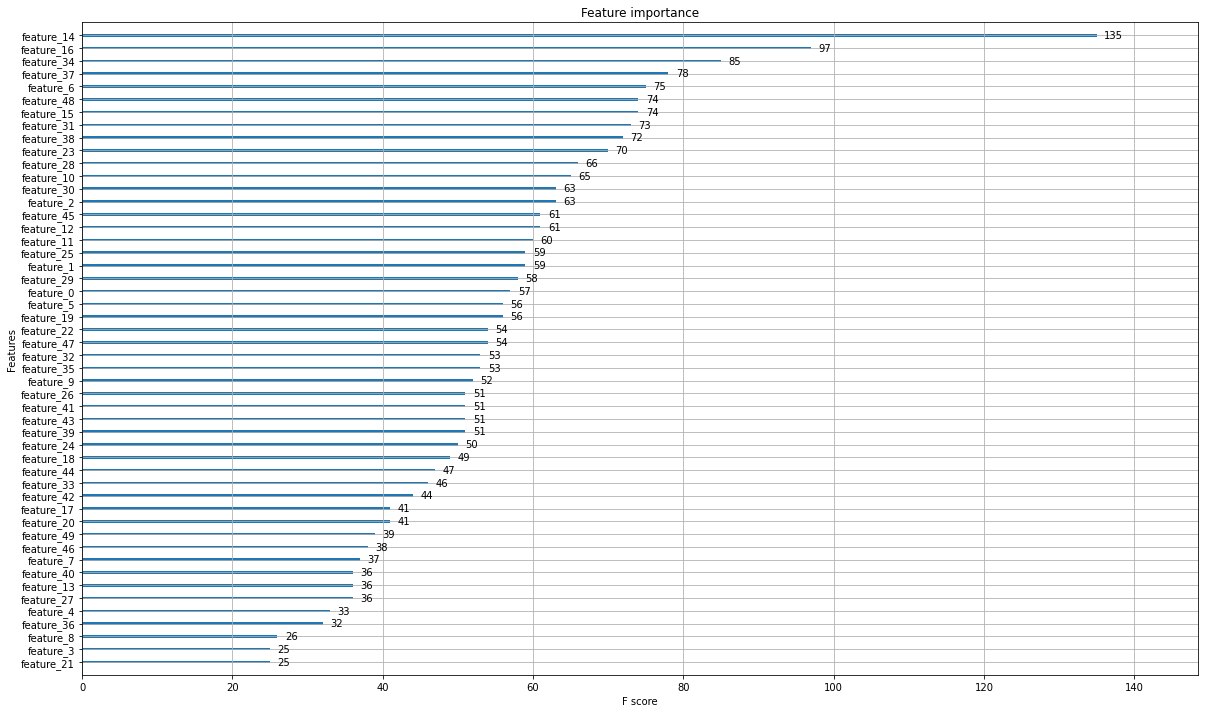

In [107]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20, 12))
plot_importance(model,ax=ax)

LGBM

In [109]:
from lightgbm import LGBMClassifier
LGB = LGBMClassifier(random_state=42, use_label_encoder=True)
LGB.fit(X_train, y_train)
y_pred_lgbm = LGB.predict(X_test)
accuracy_score(y_pred_lgbm,y_test)

0.5766